## Quantum Reservoir Computing for Chaotic Dynamics
FYP Masters project by Raihaan Usman

In [1]:
from backend.solver import Lorentz, MFE, VDP, Slope
from backend import CRCM, QRCM

import numpy as np
import os;  os.environ["OMP_NUM_THREADS"] = '32' # Imposes cores
from matplotlib import pyplot as plt

#### Configuration for Lorentz system

In [2]:
# Data generation parameters
upsample        = 1                     # To increase the dt of the ESN wrt the numerical integrator
dt              = 0.005 * upsample      # Time step
params          = [8/3, 28, 10]         # Parameters for the Lorenz system

# Define N for washout, training, validation and testing
N_washout       = 50
N_train         = 5000
N_test          = 100
N_sets          = [N_washout, N_train, N_test]

# Instantiate the solver object
lor3 = Lorentz(params, dt, N_sets)

#### CRCM for Lorenz system

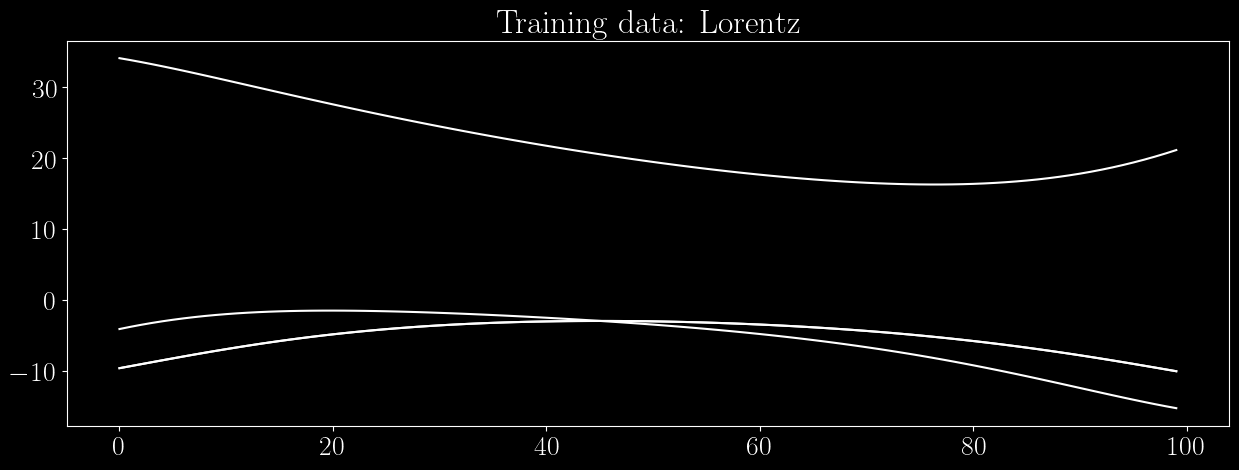

Train: 100%|██████████| 4999/4999 [00:00<00:00, 12297.68it/s]



Reservoir refreshed


Closed Loop: 100%|██████████| 99/99 [00:00<00:00, 6135.29it/s]


MSE: 3021.3570781971207


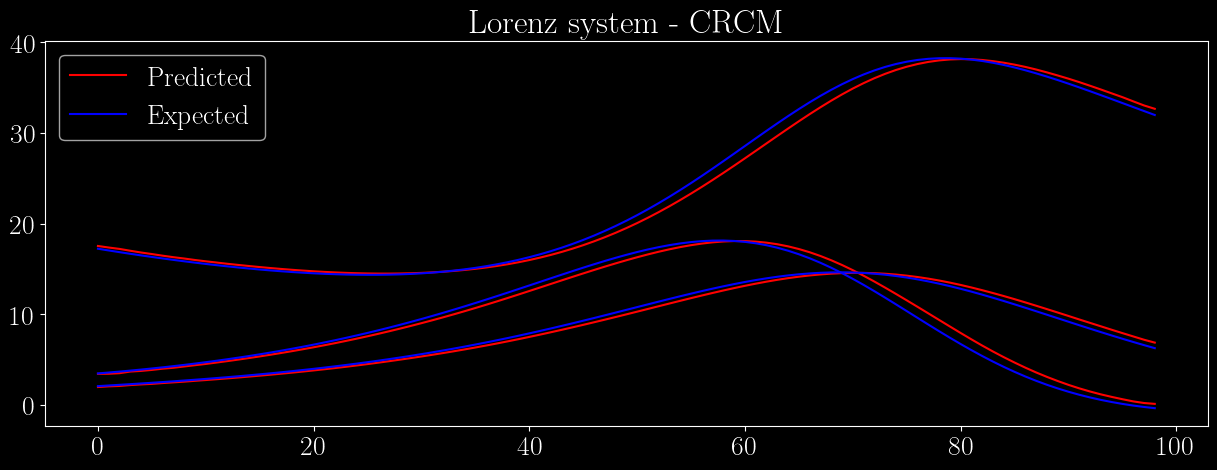

In [3]:
# Initialise the ESN
crcm = CRCM(solver=lor3,
            N_units=500,
            connectivity=10,
            eps= 5e-2,
            tik= 1e-4,
            seed=0)

# Train the ESN with the training data
crcm.train(override=True)
crcm.forward()

#### QRCM for Lorenz system

In [4]:
# # Instantiate the solver object
# lor3 = VDP(params, dt, N_sets)

# # Instantiate the QRCM object
# qrcm = QRCM(solver  = lor3,
#             qubits  = 6,
#             eps     = 0.01,
#             tik     = 1e-6)

# # Train the QRCM with the training data
# qrcm.train(override=True)
# qrcm.forward()